# Gaussian distributions with different means and variances

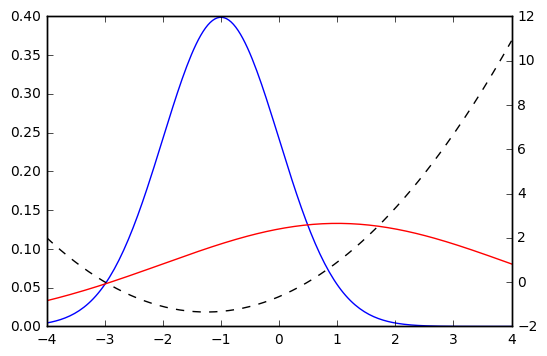

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math
from scipy.stats import norm

fig, ax1 = plt.subplots()

mu0 = -1
variance0 = 1
sigma0 = math.sqrt(variance0)
x = np.linspace(-4, 4, 200)
ax1.plot(x,mlab.normpdf(x, mu0, sigma0),'b-')

mu1 = 1
variance1 = 9
sigma1 = math.sqrt(variance1)
x = np.linspace(-4, 4, 200)
ax1.plot(x,mlab.normpdf(x, mu1, sigma1),'r-')

ax2 = ax1.twinx()
ax2.plot(x,np.log(mlab.normpdf(x, mu1, sigma1)) - np.log(mlab.normpdf(x, mu0, sigma0)),'k--')

plt.show()

# ROC curves

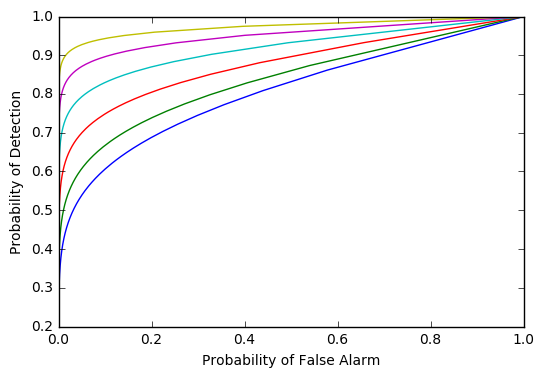

In [2]:
fig, ax1 = plt.subplots()

#Set threshold range
N = 2000
T = np.linspace(0.01, 100, N)

#Shift means to obtain various ROC curves
mu = np.linspace(0.5, 3, 6)
for index in range(6):
    mu0 = -mu[index]
    mu1 = mu[index]

#Polynomial coefficients of Likelihood Ratio Log minus threshold
    a = sigma0*sigma0 - sigma1*sigma1
    b = -2*mu1*sigma0*sigma0 + 2*mu0*sigma1*sigma1
    c = mu1*mu1*sigma0*sigma0 - mu0*mu0*sigma1*sigma1 + 2*sigma0*sigma0*sigma1*sigma1*np.log(sigma1/sigma0*T)

#Determining roots of polynomial
    x_double = -1*b/(2*a)
    x_a = np.linspace(-4, 4, N)
    x_b = np.linspace(-4, 4, N)
    for i in range(N):
        x_a[i] = x_double
        x_b[i] = x_double
        if x_double*x_double > c[i]/a:
            x_a[i] += -1*math.sqrt(x_double*x_double - c[i]/a)
            x_b[i] += 1*math.sqrt(x_double*x_double - c[i]/a)
#Probability of detection
    P_d = 1 - (norm.cdf((mu1-x_a)/sigma1) - norm.cdf((mu1-x_b)/sigma1))
#Probability of False Alarm
    P_FA = 1 - (norm.cdf((mu0-x_a)/sigma0) - norm.cdf((mu0-x_b)/sigma0))

    
    ax1.plot(P_FA,P_d)

plt.xlabel('Probability of False Alarm',fontsize = 10)
plt.ylabel('Probability of Detection',fontsize = 10)
plt.show()
